In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

#### BatchNormalization: 
Layer that normalizes its inputs.
Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
print(y_train.shape)
print(y_train[0:12])

(60000,)
[5 0 4 1 9 2 1 3 1 4 3 5]


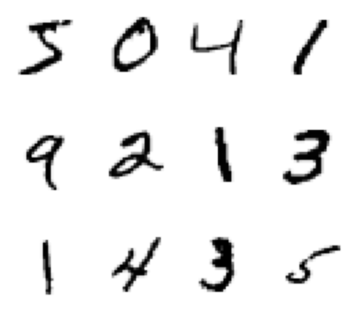

In [ ]:
plt.figure(figsize=(5, 5))
for k in range(12):
    plt.subplot(3, 4, k + 1)
    plt.imshow(X_train[k], cmap = 'Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

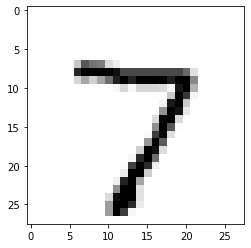

In [ ]:
plt.imshow(X_valid[0], cmap = 'Greys')

In [ ]:
X_valid.shape

(10000, 28, 28)

- Flattening two-dimensional images to one dimension

In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [ ]:
X_train.shape

(60000, 784)

- Dividing all of the values by 255, so that they range from 0 to 1

In [ ]:
X_train /= 255
X_valid /= 255

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

- Converting integer labels to one-hot
- There are 10 possible handwritten digits, so we set n_classes equal to 10

In [ ]:
y_valid[0]

7

In [ ]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [ ]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Desining a Neural Network Architecture

In [ ]:
# Simplest type of neural network model object
model = Sequential()
# Hidden Layer with a input layer of 784 neurons
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
# Output Layer
# 10 artificial neurons, corresponding to the 10 probabilities
model.add(Dense(10, activation='softmax'))

#### Configure Model

In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#### Train Model

In [ ]:
model.fit(X_train, y_train,
          batch_size=128, epochs=50,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/50
469/469 [==============================] - 4s 3ms/step - loss: 0.0919 - accuracy: 0.1095 - val_loss: 0.0915 - val_accuracy: 0.1143
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.1298 - val_loss: 0.0908 - val_accuracy: 0.1531
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.1788 - val_loss: 0.0903 - val_accuracy: 0.2069
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.2289 - val_loss: 0.0898 - val_accuracy: 0.2458
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.2528 - val_loss: 0.0893 - val_accuracy: 0.2612
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.2621 - val_loss: 0.0889 - val_accuracy: 0.2666
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.2707 - val_loss: 0.0885 - val_accuracy: 0.2745
Epoch 

## Desining Neural Network

In [ ]:
import numpy as np
from keras.layers import Activation
from keras.initializers import Zeros, RandomNormal
from keras.initializers import glorot_normal, glorot_uniform

In [ ]:
n_input = 784
n_dense = 256
b_init = Zeros()
w_init = RandomNormal(stddev = 1.0)

In [ ]:
model2 = Sequential()
model2.add(Dense(n_dense,
                 input_dim=n_input,
                 kernel_initializer=w_init,
                 bias_initializer=b_init))
model2.add(Activation('sigmoid'))

In [ ]:
# Generate random x values
x = np.random.random((1,n_input))

In [ ]:
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
model3 = Sequential()

model3.add(Dense(64, activation="relu", input_shape=(784,)))
model3.add(BatchNormalization())

model3.add(Dense(64, activation="relu"))
model3.add(BatchNormalization())

model3.add(Dense(64, activation="relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))    # 20% of the neurons are ignored during training

model3.add(Dense(10, activation="softmax"))

In [ ]:
model3.compile(loss="categorical_crossentropy",      # Exclusive for classification
               optimizer="adam",
               metrics=['accuracy'])

In [ ]:
model3.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.3924 - accuracy: 0.8835 - val_loss: 0.1657 - val_accuracy: 0.9474
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1534 - accuracy: 0.9545 - val_loss: 0.1274 - val_accuracy: 0.9611
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1115 - accuracy: 0.9655 - val_loss: 0.0997 - val_accuracy: 0.9683
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0900 - accuracy: 0.9717 - val_loss: 0.0965 - val_accuracy: 0.9715
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0735 - accuracy: 0.9764 - val_loss: 0.0930 - val_accuracy: 0.9697
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0649 - accuracy: 0.9796 - val_loss: 0.0916 - val_accuracy: 0.9724
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0589 - accuracy: 0.9813 - val_loss: 0.0850 - val_accuracy: 0.9749
Epoch 

# Estimating House Prices

In [ ]:
from keras.datasets import boston_housing

In [ ]:
(X_train, y_train), (X_valid, y_valid) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_valid: {X_valid.shape}")

X_train: (404, 13)
y_train: (404,)
X_valid: (102, 13)


In [ ]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
y_train[0]

15.2

In [ ]:
model = Sequential()

# Input layer with 13 neurons
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train,
          batch_size=8, epochs=32, verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/32
51/51 [==============================] - 1s 8ms/step - loss: 582.2978 - val_loss: 647.7111
Epoch 2/32
51/51 [==============================] - 0s 5ms/step - loss: 560.1396 - val_loss: 628.4026
Epoch 3/32
51/51 [==============================] - 0s 5ms/step - loss: 540.6197 - val_loss: 593.6111
Epoch 4/32
51/51 [==============================] - 0s 5ms/step - loss: 521.5795 - val_loss: 553.3664
Epoch 5/32
51/51 [==============================] - 0s 4ms/step - loss: 494.9836 - val_loss: 540.0081
Epoch 6/32
51/51 [==============================] - 0s 5ms/step - loss: 464.4836 - val_loss: 581.4808
Epoch 7/32
51/51 [==============================] - 0s 4ms/step - loss: 431.4370 - val_loss: 644.8583
Epoch 8/32
51/51 [==============================] - 0s 5ms/step - loss: 386.4559 - val_loss: 614.3801
Epoch 9/32
51/51 [==============================] - 0s 4ms/step - loss: 348.1909 - val_loss: 582.9874
Epoch 10/32
51/51 [==============================] - 0s 4ms/step - loss: 317.6371 

In [ ]:
# Reshape with [1, batch_size]
print(f"Predict: {model.predict(np.reshape(X_valid[42], [1, 13]))}")
print(f"Real: {y_valid[42]}")

Predict: [[18.366817]]
Real: 14.1


In [ ]:
print(np.reshape(X_valid[42], [1, 13]))
print(X_valid[42])

[[  9.32909   0.       18.1       0.        0.713     6.185    98.7
    2.2616   24.      666.       20.2     396.9      18.13   ]]
[  9.32909   0.       18.1       0.        0.713     6.185    98.7
   2.2616   24.      666.       20.2     396.9      18.13   ]


[TENSORBOARD](https://www.tensorflow.org/tensorboard/get_started)